In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_excel('/content/이젠그만_변수정리최종.xlsx')

In [ ]:
df.head()

,District,Price,Dis_GN,Dis_River,Park,Big_Mall,Art_Space,Station,Hospital,Fore_Idx
0,강남구,3882.188533,0.0,0,162,48,11,33,3,101.8
1,강남구,4094.304109,0.0,0,162,48,11,33,3,101.8
2,강남구,4262.823360,0.0,0,162,48,11,33,3,102.2
3,강남구,4144.841985,0.0,0,162,48,11,33,3,102.5
4,강남구,4197.317022,0.0,0,162,48,11,33,3,103.0


In [ ]:
# 독립변수 X에서 종속변수인 'Price' 제거 후 y로 정의
X = df.drop(['Price', 'District'], axis=1)
y = df['Price']

In [ ]:
# StandardScaler 사용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(1500, 8)

In [ ]:
# MinMaxScaler 사용
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10)
print(X_train.shape, X_test.shape)

(1200, 8) (300, 8)


# LinearRegression


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1) # -1 means use all cpu core
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

y_pred = lin_reg.predict(X_test)
lr_rms = np.sqrt(mean_squared_error(y_test, y_pred))
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print('RMSE :', lr_rms, '\n' 'MAE :', lr_mae, '\n', 'R2 Score :', lr_r2)

RMSE : 486.7301845572608 
MAE : 383.2027179791568 
 R2 Score : 0.7961705525280645


In [ ]:
# 예측 - 테스트로 실제 얼마나 예측을 잘 했는데 차이를 보여줌
y_compare={'테스트':y_test, '예측':y_pred, '차이':y_pred-y_test}
pd.DataFrame(y_compare)

,테스트,예측,차이
633,2446.345954,2869.228815,422.882861
56,6995.229717,6156.278908,-838.950809
1245,4870.582808,3753.376526,-1117.206282
1306,2550.691667,2900.316908,349.625241
1031,3115.162821,3711.483646,596.320826
...,...,...,...
1455,1620.581104,2306.340330,685.759226
823,3102.643353,2885.664607,-216.978746
1100,2435.404503,1925.400524,-510.003979
384,1952.429195,2100.617294,148.188099


In [ ]:
print('예측값과 테스트 값 차이 평균:{0:.2f}'.format(abs(y_pred-y_test).mean()))

예측값과 테스트 값 차이 평균:383.20


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
dt_rms = np.sqrt(mean_squared_error(y_test, y_pred))
dt_mae = mean_absolute_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

print('RMSE :', dt_rms.round(2), '\n' 'MAE :', dt_mae.round(2), '\n', 'R2 Score :', dt_r2.round(2))

RMSE : 184.51 
MAE : 118.24 
 R2 Score : 0.97


In [ ]:
# 예측 - 테스트로 실제 얼마나 예측을 잘 했는데 차이를 보여줌
y_compare={'테스트':y_test, '예측':y_pred, '차이':y_pred-y_test}
pd.DataFrame(y_compare)

,테스트,예측,차이
633,2446.345954,2473.037653,26.691699
56,6995.229717,6659.540420,-335.689297
1245,4870.582808,4897.224172,26.641364
1306,2550.691667,2554.530199,3.838532
1031,3115.162821,2827.601680,-287.561141
...,...,...,...
1455,1620.581104,1628.322743,7.741639
823,3102.643353,3121.535695,18.892342
1100,2435.404503,2237.917559,-197.486945
384,1952.429195,1941.789545,-10.639650


In [ ]:
print('예측값과 테스트 값 차이 평균:{0:.2f}'.format(abs(y_pred-y_test).mean()))

예측값과 테스트 값 차이 평균:118.24


# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
rf_rms = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print('RMSE :', rf_rms.round(2), '\n' 'MAE :', rf_mae.round(2), '\n', 'R2 Score :', rf_r2.round(2))

RMSE : 145.57 
MAE : 93.15 
 R2 Score : 0.98


In [ ]:
# 예측 - 테스트로 실제 얼마나 예측을 잘 했는데 차이를 보여줌
y_compare={'테스트':y_test, '예측':y_pred, '차이':y_pred-y_test}
pd.DataFrame(y_compare)

,테스트,예측,차이
633,2446.345954,2465.411835,19.065882
56,6995.229717,6821.784592,-173.445125
1245,4870.582808,4861.390325,-9.192483
1306,2550.691667,2513.745999,-36.945669
1031,3115.162821,3018.618396,-96.544425
...,...,...,...
1455,1620.581104,1622.138342,1.557238
823,3102.643353,3111.968686,9.325333
1100,2435.404503,2418.602457,-16.802046
384,1952.429195,1923.431707,-28.997488


In [ ]:
print('예측값과 테스트 값 차이 평균:{0:.2f}'.format(abs(y_pred-y_test).mean()))

예측값과 테스트 값 차이 평균:93.15


# Support Vector Machine

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)
svm_rms = np.sqrt(mean_squared_error(y_test, y_pred))
svm_mae = mean_absolute_error(y_test, y_pred)
svm_r2 = r2_score(y_test, y_pred)

print('RMSE :', svm_rms.round(2), '\n' 'MAE :', svm_mae.round(2), '\n', 'R2 Score :', svm_r2.round(2))

RMSE : 583.36 
MAE : 409.38 
 R2 Score : 0.71


In [ ]:
# 예측 - 테스트로 실제 얼마나 예측을 잘 했는데 차이를 보여줌
y_compare={'테스트':y_test, '예측':y_pred, '차이':y_pred-y_test}
pd.DataFrame(y_compare)

,테스트,예측,차이
633,2446.345954,2675.163448,228.817494
56,6995.229717,4854.799168,-2140.430548
1245,4870.582808,3268.542741,-1602.040067
1306,2550.691667,2695.457834,144.766167
1031,3115.162821,3303.503685,188.340865
...,...,...,...
1455,1620.581104,2326.966785,706.385681
823,3102.643353,2573.811515,-528.831838
1100,2435.404503,2025.248538,-410.155966
384,1952.429195,2252.320568,299.891373


In [ ]:
print('예측값과 테스트 값 차이 평균:{0:.2f}'.format(abs(y_pred-y_test).mean()))

예측값과 테스트 값 차이 평균:409.38


# XGBRegressor / LGBMRegressor

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings(action='ignore')

xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)


xgb_reg.fit(X_train, y_train)
lgb_reg.fit(X_train, y_train)


y_preds = xgb_reg.predict(X_test)
xgb_rms = np.sqrt(mean_squared_error(y_test, y_preds))
xgb_mae = mean_absolute_error(y_test, y_preds)
xgb_r2 = r2_score(y_test, y_preds)



y_pred = lgb_reg.predict(X_test)
lgb_rms = np.sqrt(mean_squared_error(y_test, y_pred))
lgb_mae = mean_absolute_error(y_test, y_pred)
lgb_r2 = r2_score(y_test, y_pred)

print('XGBRegressor')
print('RMSE :', xgb_rms.round(2), '\n' 'MAE :', xgb_mae.round(2), '\n', 'R2 Score :', xgb_r2.round(2))
print('----------------------------------------')
print('LGBMRegressor')
print('RMSE :', lgb_rms.round(2), '\n' 'MAE :', lgb_mae.round(2), '\n', 'R2 Score :', lgb_r2.round(2))


[08:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor
RMSE : 132.55 
MAE : 91.14 
 R2 Score : 0.98
----------------------------------------
LGBMRegressor
RMSE : 144.53 
MAE : 100.28 
 R2 Score : 0.98


In [ ]:
# 예측 - 테스트로 실제 얼마나 예측을 잘 했는데 차이를 보여줌
y_compare={'테스트':y_test, '예측':y_preds, '차이':abs(y_preds-y_test)}
a = pd.DataFrame(y_compare)
a

,테스트,예측,차이
633,2446.345954,2473.892822,27.546868
56,6995.229717,6871.934082,123.295635
1245,4870.582808,4859.122559,11.460250
1306,2550.691667,2550.838135,0.146468
1031,3115.162821,2911.941162,203.221658
...,...,...,...
1455,1620.581104,1649.410156,28.829052
823,3102.643353,3008.164551,94.478802
1100,2435.404503,2539.235352,103.830848
384,1952.429195,1920.363647,32.065548


In [ ]:
print('예측값과 테스트 값 차이 평균:{0:.2f}'.format(abs(y_pred-y_test).mean()))

예측값과 테스트 값 차이 평균:100.28


# 제일 성능이 좋은 XGB 모델의 테스트 값과 예측 값의 그래프 시각화

In [ ]:
# a = a.sort_values(by=['test', 'pred', 'gap'], ascending=[True, True, True])
# a = a.reset_index(drop=True)

In [ ]:
# fig = plt.figure(figsize=(30, 10))
# p = sns.lineplot(data = a)
# p.set_xlabel("ascending_index", fontsize = 10)
# p.set_ylabel("mean_price", fontsize = 10)

# Ridge / Lasso

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso

rid_reg = Ridge(alpha=1)
rid_reg.fit(X_train, y_train)

la_reg = Lasso(alpha=1)
la_reg.fit(X_train, y_train)
y_pred = la_reg.predict(X_test)

y_pred = rid_reg.predict(X_test)
rid_rms = np.sqrt(mean_squared_error(y_test, y_pred))
rid_mae = mean_absolute_error(y_test, y_pred)
rid_r2 = r2_score(y_test, y_pred)

y_pred = la_reg.predict(X_test)
la_rms = np.sqrt(mean_squared_error(y_test, y_pred))
la_mae = mean_absolute_error(y_test, y_pred)
la_r2 = r2_score(y_test, y_pred)


print('Ridge')
print('RMSE :', rid_rms.round(2), '\n' 'MAE :', rid_mae.round(2), '\n', 'R2 Score :', rid_r2.round(2))
print('----------------------------------------')
print('Lasso')
print('RMSE :', la_rms.round(2), '\n' 'MAE :', la_mae.round(2), '\n', 'R2 Score :', la_r2.round(2))

Ridge
RMSE : 486.62 
MAE : 383.12 
 R2 Score : 0.8
----------------------------------------
Lasso
RMSE : 486.29 
MAE : 382.79 
 R2 Score : 0.8


# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

ela_reg = ElasticNet(alpha=0.01, l1_ratio=0.7).fit(X_train, y_train)
y_pred = ela_reg.predict(X_test)
ela_rms = np.sqrt(mean_squared_error(y_test, y_pred))
ela_mae = mean_absolute_error(y_test, y_pred)
ela_r2 = r2_score(y_test, y_pred)

print('Elastic Net')
print('RMSE :', ela_rms.round(2), '\n' 'MAE :', ela_mae.round(2), '\n', 'R2 Score :', ela_r2.round(2))

Elastic Net
RMSE : 486.33 
MAE : 382.92 
 R2 Score : 0.8


# GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = GradientBoostingRegressor().fit(X_train, y_train)
y_pred = gbr_reg.predict(X_test)
gbr_rms = np.sqrt(mean_squared_error(y_test, y_pred))
gbr_mae = mean_absolute_error(y_test, y_pred)
gbr_r2 = r2_score(y_test, y_pred)

print('GradientBoostingRegressor')
print('RMSE :', gbr_rms.round(2), '\n' 'MAE :', gbr_mae.round(2), '\n', 'R2 Score :', gbr_r2.round(2))

GradientBoostingRegressor
RMSE : 147.98 
MAE : 101.74 
 R2 Score : 0.98


# 사용한 회귀 모델의 RMSE, MAE, R2 Score 확인
 - LinearRegressor, DecisionTreeRegressor, RandomForestRegressor, SupportVectorMachine, XGBRegressor, LGBMRegressor, Ridge, Lasso, ElasticNet, GradientBoostingRegressor

In [ ]:
print('LinearRegressor')
print('RMSE :', lr_rms.round(2), '\n' 'MAE :', lr_mae.round(2), '\n', 'R2 Score :', lr_r2.round(2))
print('----------------------------------------')
print('DecisionTreeRegressor')
print('RMSE :', dt_rms.round(2), '\n' 'MAE :', dt_mae.round(2), '\n', 'R2 Score :', dt_r2.round(2))
print('----------------------------------------')
print('RandomForestRegressor')
print('RMSE :', rf_rms.round(2), '\n' 'MAE :', rf_mae.round(2), '\n', 'R2 Score :', rf_r2.round(2))
print('----------------------------------------')
print('SupportVectorMachine')
print('RMSE :', svm_rms.round(2), '\n' 'MAE :', svm_mae.round(2), '\n', 'R2 Score :', svm_r2.round(2))
print('----------------------------------------')
print('XGBRegressor')
print('RMSE :', xgb_rms.round(2), '\n' 'MAE :', xgb_mae.round(2), '\n', 'R2 Score :', xgb_r2.round(2))
print('----------------------------------------')
print('LGBMRegressor')
print('RMSE :', lgb_rms.round(2), '\n' 'MAE :', lgb_mae.round(2), '\n', 'R2 Score :', lgb_r2.round(2))
print('----------------------------------------')
print('Ridge')
print('RMSE :', rid_rms.round(2), '\n' 'MAE :', rid_mae.round(2), '\n', 'R2 Score :', rid_r2.round(2))
print('----------------------------------------')
print('Lasso')
print('RMSE :', la_rms.round(2), '\n' 'MAE :', la_mae.round(2), '\n', 'R2 Score :', la_r2.round(2))
print('----------------------------------------')
print('Elastic Net')
print('RMSE :', ela_rms.round(2), '\n' 'MAE :', ela_mae.round(2), '\n', 'R2 Score :', ela_r2.round(2))
print('----------------------------------------')
print('GradientBoostingRegressor')
print('RMSE :', gbr_rms.round(2), '\n' 'MAE :', gbr_mae.round(2), '\n', 'R2 Score :', gbr_r2.round(2))

LinearRegressor
RMSE : 486.73 
MAE : 383.2 
 R2 Score : 0.8
----------------------------------------
DecisionTreeRegressor
RMSE : 184.51 
MAE : 118.24 
 R2 Score : 0.97
----------------------------------------
RandomForestRegressor
RMSE : 145.57 
MAE : 93.15 
 R2 Score : 0.98
----------------------------------------
SupportVectorMachine
RMSE : 583.36 
MAE : 409.38 
 R2 Score : 0.71
----------------------------------------
XGBRegressor
RMSE : 132.55 
MAE : 91.14 
 R2 Score : 0.98
----------------------------------------
LGBMRegressor
RMSE : 144.53 
MAE : 100.28 
 R2 Score : 0.98
----------------------------------------
Ridge
RMSE : 486.62 
MAE : 383.12 
 R2 Score : 0.8
----------------------------------------
Lasso
RMSE : 486.29 
MAE : 382.79 
 R2 Score : 0.8
----------------------------------------
Elastic Net
RMSE : 486.33 
MAE : 382.92 
 R2 Score : 0.8
----------------------------------------
GradientBoostingRegressor
RMSE : 147.98 
MAE : 101.74 
 R2 Score : 0.98


# 10개의 모델 중 우수한 지표 확인 

In [ ]:
rms_lst = [lr_rms, dt_rms, rf_rms, svm_rms, xgb_rms, lgb_rms, rid_rms, la_rms, ela_rms, gbr_rms]
mae_lst = [lr_mae, dt_mae, rf_mae, svm_mae, xgb_mae, lgb_mae, rid_mae, la_mae, ela_mae, gbr_mae]
r2_lst = [lr_r2, dt_r2, rf_r2, svm_r2, xgb_r2, lgb_r2, rid_r2, la_r2, ela_r2, gbr_r2]

print('RMSE 최소 값 :', min(rms_lst).round(2))
print('MAE 최소 값 :', min(mae_lst).round(2))
print('R2 최대 값 :', max(r2_lst).round(2))

RMSE 최소 값 : 132.55
MAE 최소 값 : 91.14
R2 최대 값 : 0.98


# GridSearchCV

In [ ]:
# 최적의 파라미터를 찾기 위한 툴
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [1, 3, 10, 30, 50], 'max_features': [2, 4, 6, 8, 10, 12]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

xgb_reg = XGBRegressor(random_state=0, n_estimators=1000)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(xgb_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [1, 3, 10, 30, 50]},
    

In [ ]:
cvres =  grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2800.3218078694113 {'max_features': 2, 'n_estimators': 1}
2295.5736372422048 {'max_features': 2, 'n_estimators': 3}
1171.987221544269 {'max_features': 2, 'n_estimators': 10}
302.3930792386081 {'max_features': 2, 'n_estimators': 30}
210.72724102401205 {'max_features': 2, 'n_estimators': 50}
2800.3218078694113 {'max_features': 4, 'n_estimators': 1}
2295.5736372422048 {'max_features': 4, 'n_estimators': 3}
1171.987221544269 {'max_features': 4, 'n_estimators': 10}
302.3930792386081 {'max_features': 4, 'n_estimators': 30}
210.72724102401205 {'max_features': 4, 'n_estimators': 50}
2800.3218078694113 {'max_features': 6, 'n_estimators': 1}
2295.5736372422048 {'max_features': 6, 'n_estimators': 3}
1171.987221544269 {'max_features': 6, 'n_estimators': 10}
302.3930792386081 {'max_features': 6, 'n_estimators': 30}
210.72724102401205 {'max_features': 6, 'n_estimators': 50}
2800.3218078694113 {'max_features': 8, 'n_estimators': 1}
2295.5736372422048 {'max_features': 8, 'n_estimators': 3}
1171.987221

In [ ]:
cv = pd.DataFrame(grid_search.cv_results_)
cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008198,0.003408,0.000670,0.000047,2,1,NaN,"{'max_features': 2, 'n_estimators': 1}",-8.082656e+06,-8.080130e+06,-7.635653e+06,-7.676748e+06,-7.733824e+06,-7.841802e+06,198096.301062,31,-7.783876e+06,-7.769897e+06,-7.881723e+06,-7.869604e+06,-7.862090e+06,-7.833438e+06,46806.665479
1,0.008902,0.001491,0.000788,0.000163,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-5.459824e+06,-5.426835e+06,-5.104905e+06,-5.149947e+06,-5.206781e+06,-5.269658e+06,145804.989279,22,-5.219164e+06,-5.208939e+06,-5.284722e+06,-5.273821e+06,-5.271943e+06,-5.251718e+06,31230.284408
2,0.016014,0.004996,0.000885,0.000053,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-1.459204e+06,-1.415078e+06,-1.316108e+06,-1.303447e+06,-1.373933e+06,-1.373554e+06,58779.839464,13,-1.358076e+06,-1.352661e+06,-1.367442e+06,-1.365369e+06,-1.366595e+06,-1.362029e+06,5739.117988
3,0.021286,0.002376,0.001656,0.000872,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-9.912033e+04,-9.370467e+04,-8.472477e+04,-9.194688e+04,-8.771122e+04,-9.144157e+04,4967.318071,7,-7.674731e+04,-7.881096e+04,-8.005199e+04,-7.809280e+04,-7.853939e+04,-7.844849e+04,1070.641076
4,0.029410,0.001751,0.001229,0.000185,2,50,NaN,"{'max_features': 2, 'n_estimators': 50}",-4.534903e+04,-4.469147e+04,-3.862840e+04,-5.290222e+04,-4.045873e+04,-4.440597e+04,4942.028609,1,-3.134943e+04,-3.356911e+04,-3.228391e+04,-2.995194e+04,-3.096192e+04,-3.162326e+04,1227.065477


In [ ]:
# GridSearch에 입력한 파라미터 중 가장 최적의 파라미터
grid_search.best_params_

{'max_features': 2, 'n_estimators': 50}

In [ ]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, max_features=2, min_child_weight=1, missing=None,
             n_estimators=50, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# 모델 성능에 가장 영향을 주는 특성 확인
 - feature_importance

Text(0.5, 1.0, 'Feature Importance')

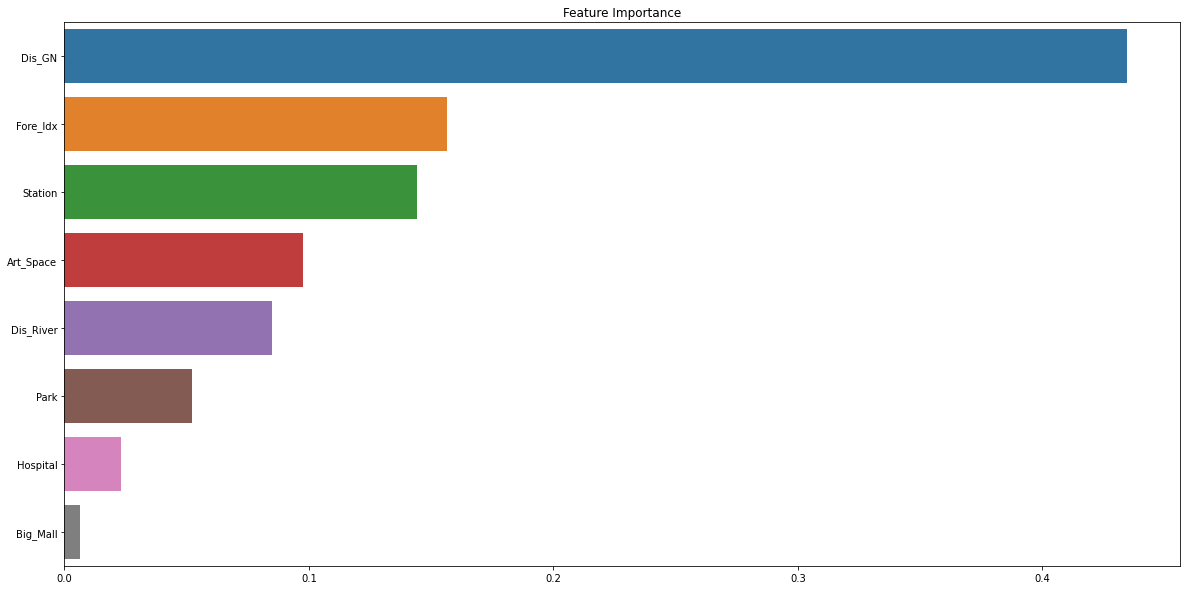

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_series = pd.Series(data=feature_importances, index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
fig = plt.figure(figsize=(20,10))
sns.barplot(x=feature_series, y=feature_series.index)
# plt.bar(range(len(feature_importances)), feature_importances)
# plt.xticks(range(len(feature_importances)), X.columns)
plt.title('Feature Importance')

### 강남구와의 거리가 가장 높고, 그 다음 선행지수, 지하철 역 수 순으로 특성 중요도를 확인할 수 있다.

In [ ]:
# GridSearch로 도출한 파라미터로 적용한 모델과 기존 XGB모델의 Default 값과의 점수 비교

final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
fi_rms = np.sqrt(mean_squared_error(y_test, y_pred))
fi_mae = mean_absolute_error(y_test, y_pred)
fi_r2 = r2_score(y_test, y_pred)

print('GridSearchCV적용 이후 XGBRegressor')
print('RMSE :', fi_rms.round(2), '\n' 'MAE :', fi_mae.round(2), '\n', 'R2 Score :', fi_r2.round(2))
print('----------------------------------------')



print('기존 XGBRegressor (파라미터는 default값)')
print('RMSE :', xgb_rms.round(2), '\n' 'MAE :', xgb_mae.round(2), '\n', 'R2 Score :', xgb_r2.round(2))

GridSearchCV적용 이후 XGBRegressor
RMSE : 184.95 
MAE : 133.73 
 R2 Score : 0.97
----------------------------------------
기존 XGBRegressor
RMSE : 132.55 
MAE : 91.14 
 R2 Score : 0.98


## 결론적으로 우리가 선정한 변수들 중, 서울시 아파트 가격에 가장 영향을 주는 특성은 강남구와의 거리였으며, 가장 성능이 좋았던 XGB 모델로 예측한 결과 절대값 예측 오차는 대략 91만원입니다.